In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Any results you write to the current directory are saved as output.

['master.csv']


In [2]:
#Reading CSV file into dataframe
df = pd.read_csv('../input/master.csv')

# Exploring Dataset

In [3]:
#Exploring how the data is in the dataset
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
#Exploring Dataset
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
#Exploring Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


# *Visualization: Count of Suicides Yearly*

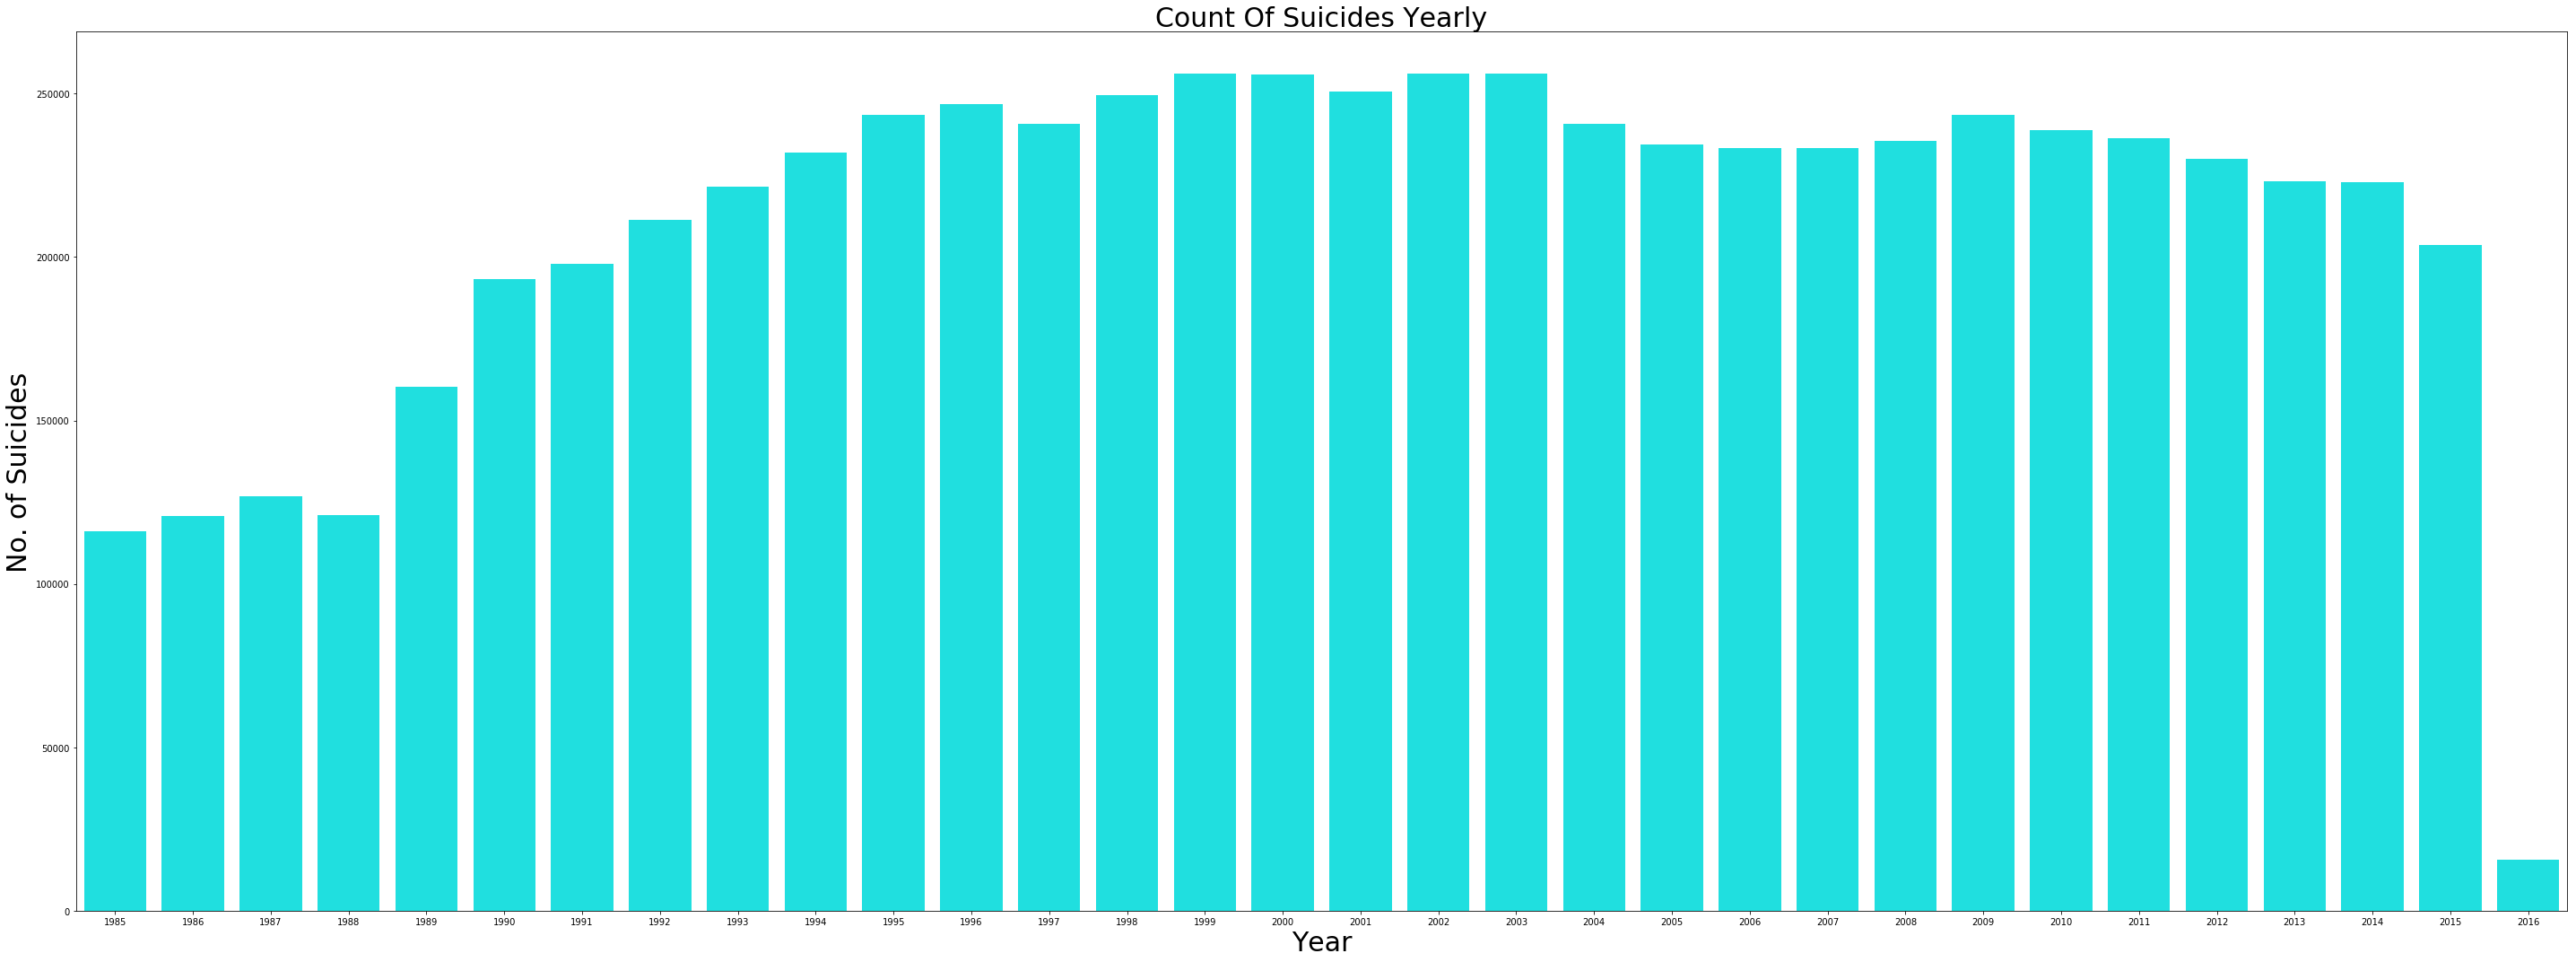

In [6]:
s_sum = pd.DataFrame(df['suicides_no'])
s_sum = s_sum.groupby(df['year']).sum()
s_sum = s_sum.reset_index().sort_values(by='suicides_no',ascending=False)
fig = plt.figure(figsize=(40,15))
sns.barplot(x='year',y='suicides_no',data=s_sum,color='cyan')
plt.title('Count Of Suicides Yearly',fontsize=30)
plt.xlabel("Year",fontsize=30)
plt.ylabel("No. of Suicides",fontsize=30)
plt.tight_layout()

# *Visualization: Univariate Numerical Columns*

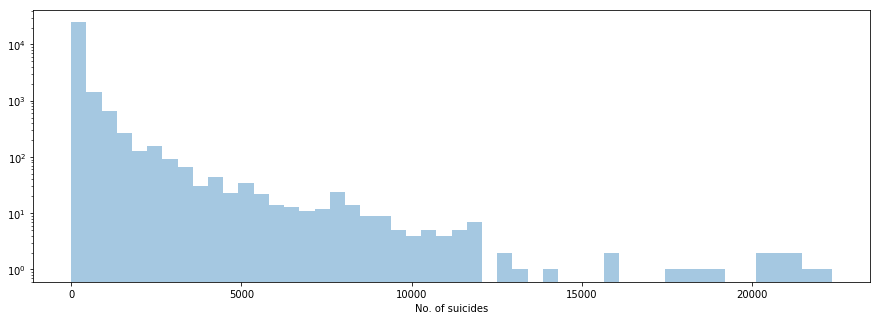

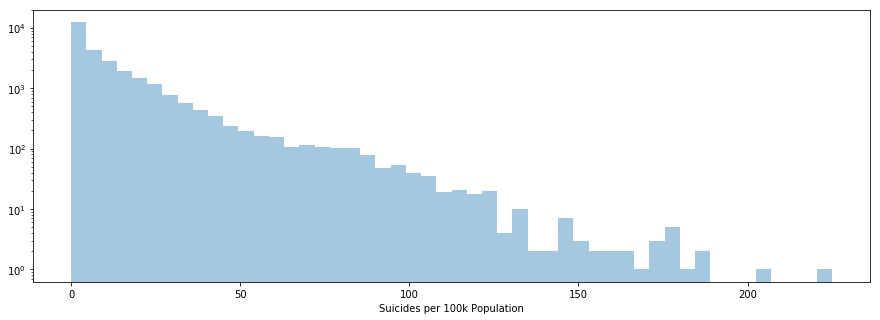

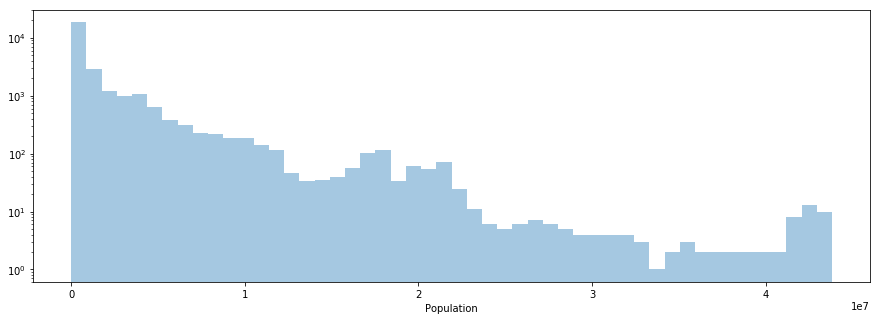

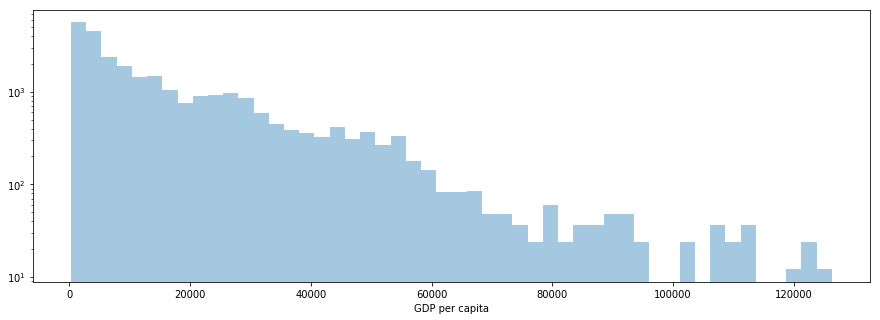

In [7]:
plt.rcParams['figure.figsize'] = (15,5)
sns.distplot(df.suicides_no,kde=False,hist_kws={'log':True})
plt.xlabel("No. of suicides")
plt.show()
sns.distplot(df['suicides/100k pop'],kde=False,hist_kws={'log':True})
plt.xlabel("Suicides per 100k Population")
plt.show()
sns.distplot(df.population,kde=False,hist_kws={'log':True})
plt.xlabel("Population")
plt.show()
sns.distplot(df['gdp_per_capita ($)'],kde=False,hist_kws={'log':True})
plt.xlabel("GDP per capita")
plt.show()

In [8]:
unique_country = list(df.country.unique())
x_plot = df[df['sex'] == 'male']
x_plot = x_plot[x_plot['age'] == '15-24 years']
x_plot = x_plot[x_plot['country'] == 'Albania']
x_plot = x_plot.drop('HDI for year',axis = 1)
x_plot
y_plot = df[df['sex'] == 'female']
y_plot = y_plot[y_plot['age'] == '15-24 years']
y_plot = y_plot[y_plot['country'] == 'Albania']

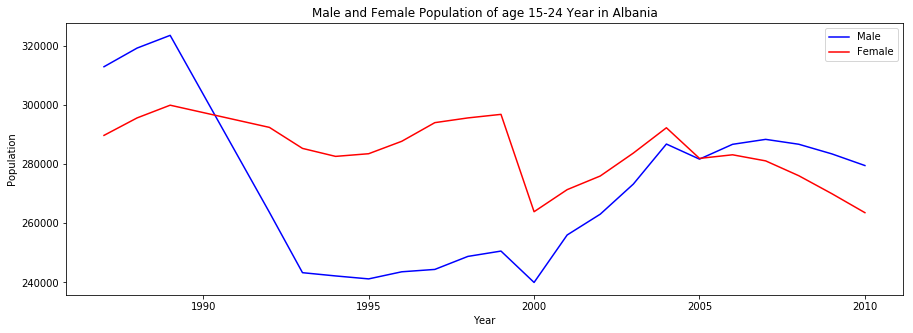

In [9]:
plt.plot(x_plot.year,x_plot.population,'blue')
plt.plot(y_plot.year,y_plot.population,'red')
plt.xlabel('Year')
plt.legend(['Male','Female'])
plt.ylabel('Population')
plt.title('Male and Female Population of age 15-24 Year in Albania')
plt.show()

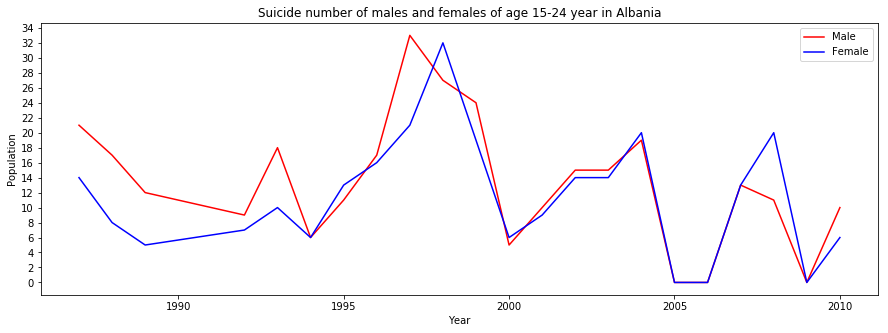

In [10]:
plt.plot(x_plot.year,x_plot.suicides_no,'red')
plt.plot(y_plot.year,y_plot.suicides_no,'blue')
plt.xlabel('Year')
plt.legend(['Male','Female'])
plt.yticks(np.arange(0,35,2))
plt.ylabel('Population')
plt.title('Suicide number of males and females of age 15-24 year in Albania')
plt.show()

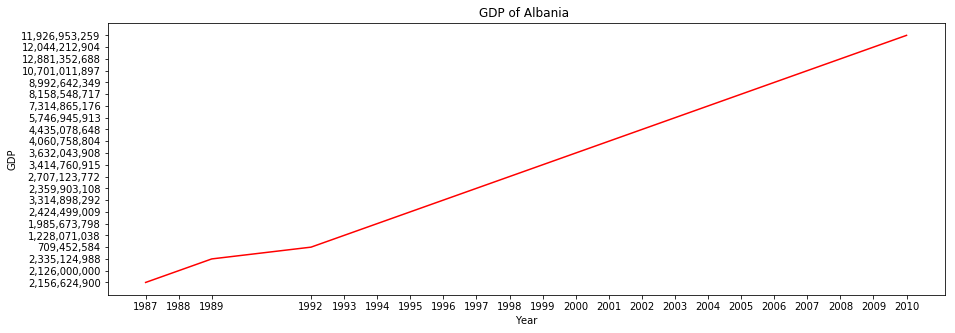

In [11]:
# x_plot.sort_values(' gdp_for_year ($) ')
plt.plot(x_plot.year,x_plot[' gdp_for_year ($) '],'red')
plt.xlabel('Year')
# plt.xlim(1985,2015)
plt.xticks(x_plot.year.unique())
plt.ylabel('GDP')
plt.title('GDP of Albania ')
plt.show()